# Unit Test for Leica Scan Processing
Run the below code and compare it to the expected results at the bottom.  This is not rigourous but better then nothing.

In [1]:
%matplotlib inline
import numpy as np

Masking file: data/27mar2019/Clean9.ptx.csv
Masking file: data/27mar2019/Clean11.ptx.csv
CPU times: user 4min 5s, sys: 2min 58s, total: 7min 4s
Wall time: 1min 17s


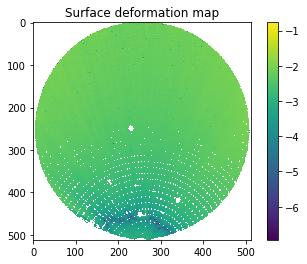

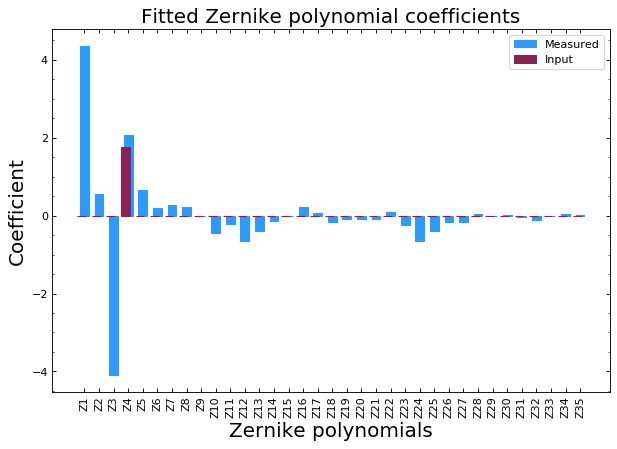

In [2]:
%%time
from plotting import barChartPlot, imagePlot
from lassiAnalysis import extractZernikesLeicaScanPair
n = 512
nZern = 36
pFitGuess = [60., 0., 0., -50., 0., 0.]
rMaskRadius = 48.
expected = np.zeros(nZern)
expected[4] = 1.75
fn1 = 'data/27mar2019/Clean9.ptx.csv'
fn2 = 'data/27mar2019/Clean11.ptx.csv'
diff, fitlist = extractZernikesLeicaScanPair(fn1, fn2, n=n, nZern=nZern, pFitGuess=pFitGuess, rMaskRadius=rMaskRadius)
imagePlot(np.log10(np.abs(diff)), 'Surface deformation map')
barChartPlot(np.arange(1, nZern), np.array(fitlist[1:nZern])*1000., expected=expected[1:nZern])

In [1]:
from lassiAnalysis import processLeicaScanPair
fn1 = "data/27mar2019/Clean9.ptx"
fn2 = "data/27mar2019/Clean11.ptx"

Processing PTX file ...
ProcessNewPTXData with:  -8.0 50.0 -10.0 45.5
Picking 10000 random data points from a total of 12539831
Skipped 0 non-data lines
Skipped 0 non-data lines
Starting with 12539831 lines of data
Filtered out 3284344 points of 12539831 (26.19%) intensity equal to zero
Now we have 9255487 lines of data
neighborFilter reduces 9255487 points to 9207937 points (47550 filtered, 0.513749 %) using tol: 0.122000
Now we have 9207937 lines of data
Intensity: max= 1.00, min= 0.00, mean= 0.82, std= 0.05
radial limit filtered out 1807744 points outside radius 45.50
Now we have 7400193 lines of data
z - limit filtered out 0 points below -80.00
Rotating about Z by -10.00 degrees
Now we have 7400193 lines of data
Elapsed minutes:  1.77
Smoothing data ...
system cmd:  runGpuSmooth /home/scratch/psalas/LASSI/gpu_smoothing psalas vegas-hpc10 /home/scratch/psalas/LASSI/lassi-analysis/data/27mar2019/Clean9.ptx.csv Clean9.ptx.csv 512 0.00100
GPUs created file:  /home/scratch/psalas/LASSI/

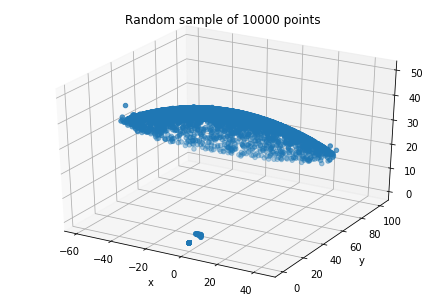

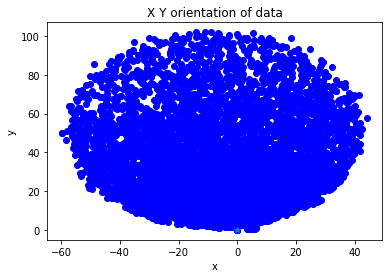

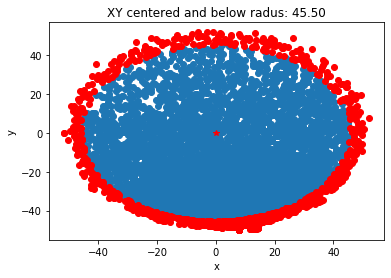

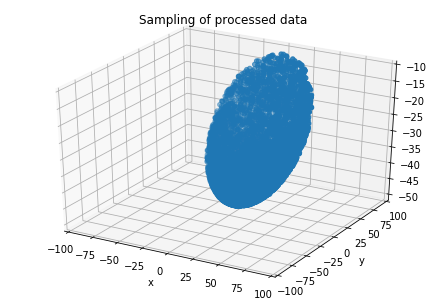

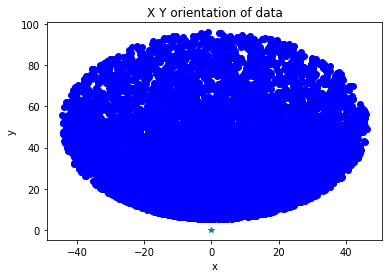

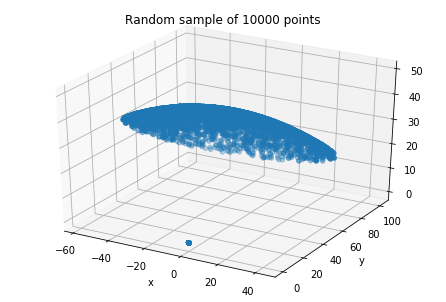

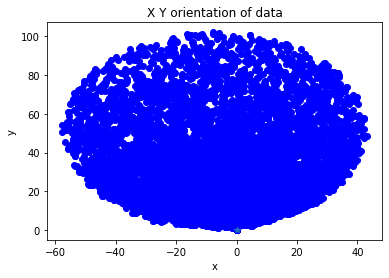

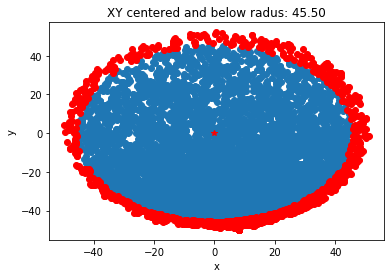

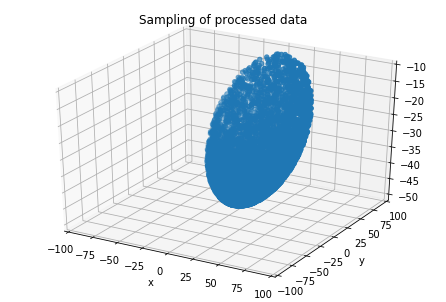

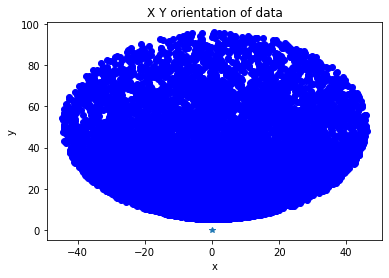

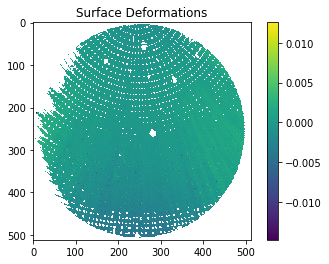

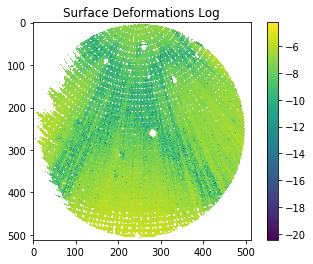

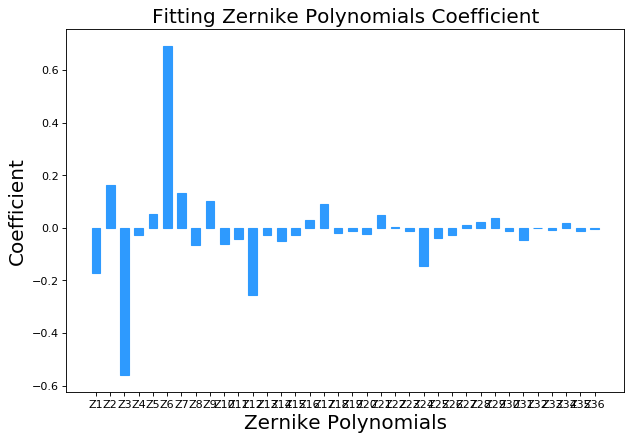

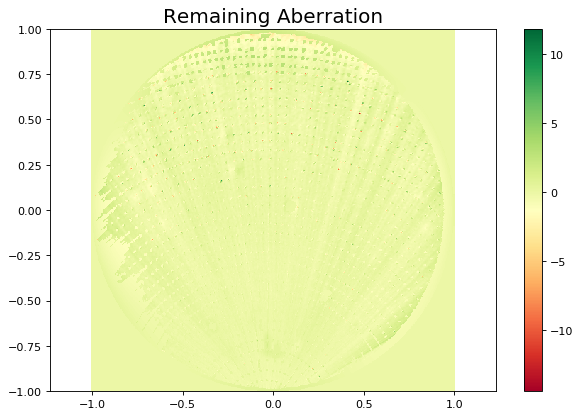

                            Zernike Polynomials List                              
----------------------------------------------------------------------------------
|   Z1  |   Z2  |   Z3  |   Z4  |   Z5  |   Z6  |   Z7  |   Z8  |   Z9  |  Z10  |
----------------------------------------------------------------------------------
| 0.000 | 0.161 |-0.561 |-0.029 | 0.051 | 0.692 | 0.131 |-0.067 | 0.103 |-0.062 |
----------------------------------------------------------------------------------
|  Z11  |  Z12  |  Z13  |  Z14  |  Z15  |  Z16  |  Z17  |  Z18  |  Z19  |  Z20  |
----------------------------------------------------------------------------------
|-0.041 |-0.254 |-0.027 |-0.051 |-0.027 | 0.031 | 0.090 |-0.020 |-0.012 |-0.025 |
----------------------------------------------------------------------------------
|  Z21  |  Z22  |  Z23  |  Z24  |  Z25  |  Z26  |  Z27  |  Z28  |  Z29  |  Z30  |
----------------------------------------------------------------------------------
| 0.049 |

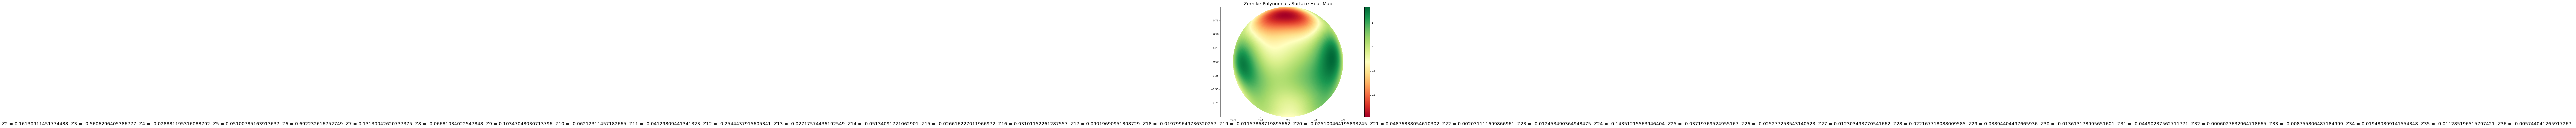

Converting from Noll to Active Surface ANSI Zernikies ...
nolZs
[0]
[0.16130911451774488, -0.5606296405386777]
[-0.028881195316088792, 0.05100785163913637, 0.692232616752749]
[0.13130042620737375, -0.06681034022547848, 0.10347048030713796, -0.06212311457182665]
[-0.04129809441341323, -0.2544437915605341, -0.02717574436192549, -0.05134091721062901, -0.026616227011966972]
[0.03101152261287557, 0.09019690951808729, -0.019799649736320257, -0.01157868719895662, -0.025100464195893245, 0.04876838054610302]
[0.002031111699866961, -0.012453490364948475, -0.14351215563946404, -0.03719769524955167, -0.025277258543140523, 0.012303493770541662, 0.022167718088009585]
[0.03894404497665936, -0.013613178995651601, -0.04490237562711771, 0.0006027632964718665, -0.008755806487184999, 0.019480899141554348, -0.011285196515797421, -0.005744041265917267]
active surface Zs
[0]
[0.16130911451774488, -0.5606296405386777]
[0.692232616752749, -0.028881195316088792, 0.05100785163913637]
[-0.06212311457182665, -0.06

In [2]:
%%time
r = processLeicaScanPair(fn1, fn2, rot=-10., rFilter=True)

Loading processed data from file: Clean9.ptx.processed.npz
Loading processed data from file: Clean11.ptx.processed.npz
Finding difference between scans ...
xs1 dims -45.46394348144594 46.85259032249385 0.6943234205239577
ys1 dims 4.445675373077337 95.8570700669661 50.15137272002172
xs2 dims -45.41881942749027 46.9443645700812 0.7627725712954643
ys2 dims 4.445710659027044 95.86489022057502 50.15530043980103
Center (0.694323, 50.151373), Removing points close to edge: radius=45.500000
radialReplace replaced 60900 points with nan
Mean of diffs:  -0.0001810545610656006
Std of diffs:  0.0013623869776464108
Fitting difference to zernikies ...


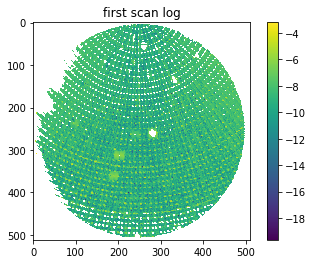

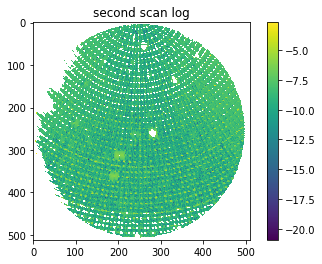

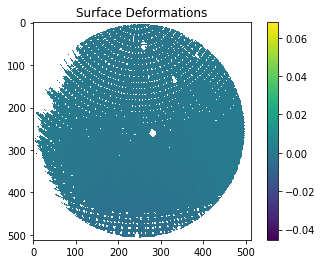

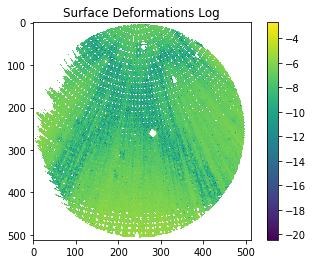

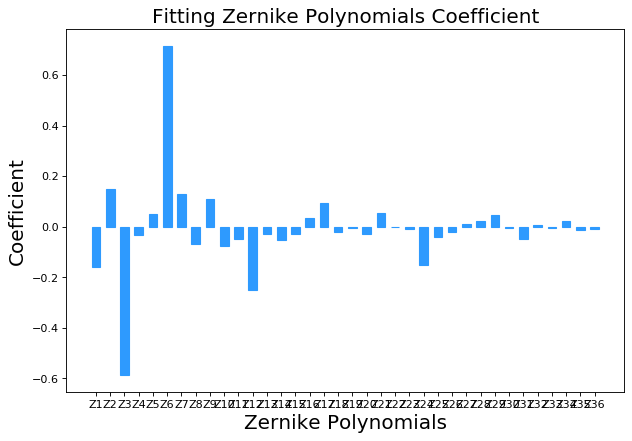

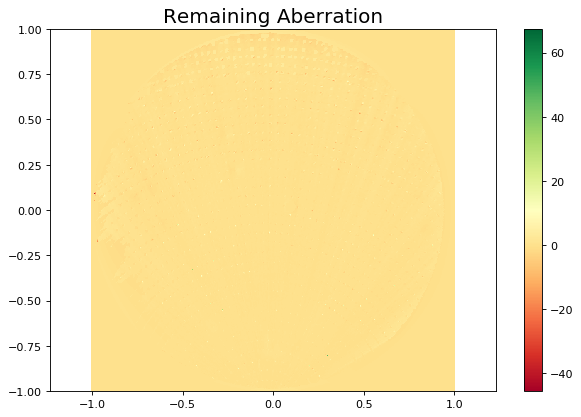

                            Zernike Polynomials List                              
----------------------------------------------------------------------------------
|   Z1  |   Z2  |   Z3  |   Z4  |   Z5  |   Z6  |   Z7  |   Z8  |   Z9  |  Z10  |
----------------------------------------------------------------------------------
| 0.000 | 0.151 |-0.588 |-0.033 | 0.050 | 0.715 | 0.129 |-0.068 | 0.109 |-0.076 |
----------------------------------------------------------------------------------
|  Z11  |  Z12  |  Z13  |  Z14  |  Z15  |  Z16  |  Z17  |  Z18  |  Z19  |  Z20  |
----------------------------------------------------------------------------------
|-0.048 |-0.250 |-0.030 |-0.052 |-0.031 | 0.036 | 0.093 |-0.021 |-0.004 |-0.029 |
----------------------------------------------------------------------------------
|  Z21  |  Z22  |  Z23  |  Z24  |  Z25  |  Z26  |  Z27  |  Z28  |  Z29  |  Z30  |
----------------------------------------------------------------------------------
| 0.054 |

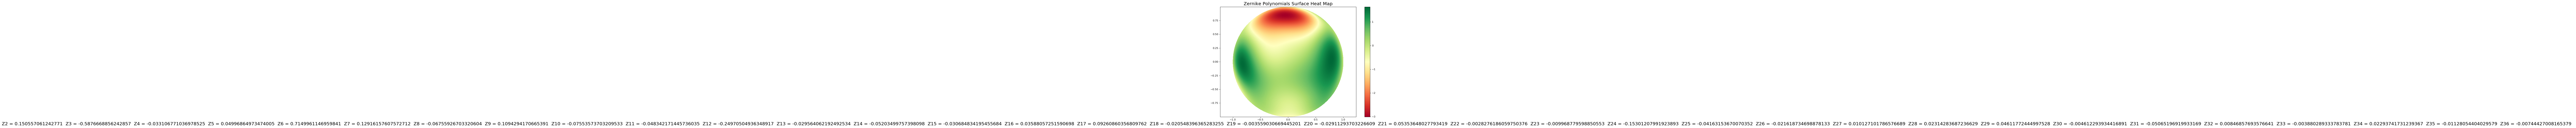

Converting from Noll to Active Surface ANSI Zernikies ...
nolZs
[0]
[0.150557061242771, -0.5876668856242857]
[-0.033106771036978525, 0.04996864973474005, 0.7149961146959841]
[0.12916157607572712, -0.06755926703320604, 0.1094294170665391, -0.07553573703209533]
[-0.048342171445736035, -0.24970504936348917, -0.029564062192492534, -0.05203499757398098, -0.030684834195455684]
[0.03588057251590698, 0.09260860356809762, -0.020548396365283255, -0.003559030669445201, -0.02911293703226609, 0.05353648027793419]
[-0.0028276186059750376, -0.009968779598850553, -0.15301207991923893, -0.04163153670070352, -0.021618734698878133, 0.010127101786576689, 0.02314283687236629]
[0.04611772444997528, -0.004612293934416891, -0.05065196919933169, 0.00846857693576641, -0.003880289333783781, 0.02293741731239367, -0.01128054404029579, -0.00744427008165379]
active surface Zs
[0]
[0.150557061242771, -0.5876668856242857]
[0.7149961146959841, -0.033106771036978525, 0.04996864973474005]
[-0.07553573703209533, -0.067559

In [2]:
# compare the two scans we processed above again, this time applying
# a radial filter to take out the edge effects
from lassiAnalysis import processLeicaScanPair
r = processLeicaScanPair(fn1, fn2, rFilter=True, processed=True)

## Compare to expected results
Here's what we got back in June 2019:
![surface](docs/scan9vs11-Z4-surface.png)
![zernikes](docs/scan9vs11-Z4-zernikes.png)